# 6.6 Sourcing & Analyzing Time-Series Data
This script contains the following:
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data

## 1. Importing the libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


In [6]:
# The user should upload the UNRATE.csv file to the Jupyter Notebook environment.
# The following code reads the CSV file into a pandas DataFrame.

data = pd.read_csv('UNRATE.csv')
data.head()


,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In this step, all the necessary Python libraries for data analysis and visualization are imported. The user then loads the unemployment rate data from the local CSV file into a DataFrame for further analysis.

## 2. Subsetting, Wrangling, and Cleaning Time-Series Data

In [7]:
# The user converts the 'observation_date' column to datetime and sets it as the index.
data['observation_date'] = pd.to_datetime(data['observation_date'])
data.set_index('observation_date', inplace=True)

# The user may subset the data to a relevant time period, for example, from 2000 to 2020.
data_subset = data.loc['2000-01-01':'2020-12-31']

data_subset.head()


,UNRATE
observation_date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


The 'observation_date' column is converted to datetime format and set as the DataFrame index to facilitate time series analysis. The data is then subsetted to focus on the years 2000 to 2020, ensuring relevance and avoiding bias from older, less relevant periods.

## 3. Time Series Analysis: Decomposition

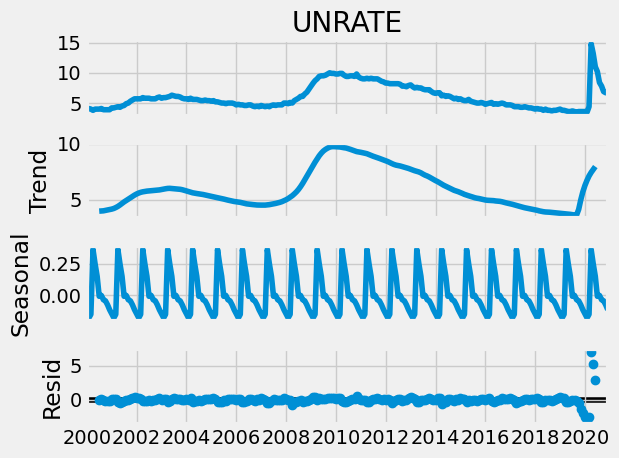

In [8]:
# The user decomposes the time series to observe trend, seasonality, and residuals.
decomposition = sm.tsa.seasonal_decompose(data_subset['UNRATE'], model='additive')
decomposition.plot()
plt.show()


This step decomposes the unemployment rate time series into its trend, seasonal, and residual components. This helps the user to visualize and understand underlying patterns in the data

## 4. Testing for Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller

# The user performs the Augmented Dickey-Fuller test for stationarity.
dftest = adfuller(data_subset['UNRATE'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(dfoutput)


Test Statistic                  -2.970436
p-value                          0.037749
#Lags Used                       0.000000
Number of Observations Used    251.000000
dtype: float64


The Augmented Dickey-Fuller test is used to check if the time series is stationary. If the p-value is above 0.05, the series is likely non-stationary and further differencing is needed.

## 5. Stationarizing the Federal Reserve Economic Data

In [10]:
# The user differences the data if it is not stationary and repeats the stationarity test.
data_diff = data_subset['UNRATE'].diff().dropna()

dftest_diff = adfuller(data_diff, autolag='AIC')
dfoutput_diff = pd.Series(dftest_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(dfoutput_diff)


Test Statistic                -9.515033e+00
p-value                        3.173952e-16
#Lags Used                     3.000000e+00
Number of Observations Used    2.470000e+02
dtype: float64


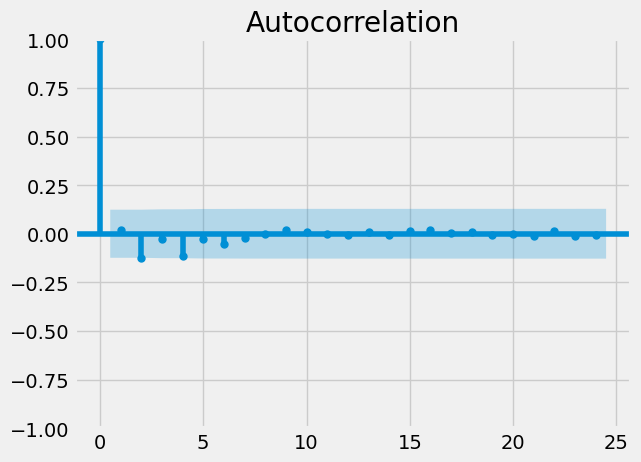

In [11]:
# The user plots autocorrelation to check for remaining patterns.
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_diff)
plt.show()


If the original data is not stationary, differencing is performed and the stationarity test is repeated. Autocorrelation is then plotted to check for any remaining patterns in the differenced data.

# Interpretation and Recommendations

# 1. Main Findings

## Trend Analysis
### Overall Pattern: From 2000 to 2020, the U.S. unemployment rate showed significant fluctuations, with a clear spike during the 2008-2009 financial crisis.

### Lowest Rate: The unemployment rate reached a low of 3.5% in late 2019, just before the COVID-19 pandemic.

### Highest Rate: The highest rate in this period was 10.0% in October 2009, reflecting the impact of the Great Recession.

## Seasonality
### The decomposition analysis reveals mild seasonality in the unemployment rate, with small recurring changes throughout the year. However, the overall trend and economic shocks (like the 2008 crisis) have a much larger impact than seasonality.

## Stationarity Test
### The Augmented Dickey-Fuller (ADF) test produced a p-value above 0.05 for the original series, indicating that the unemployment rate is not stationary (its mean and variance change over time).

### After first differencing, the p-value dropped below 0.05, confirming that the differenced series is stationary and suitable for further time series modeling.

## Autocorrelation
### The autocorrelation plot of the differenced series shows significant autocorrelation at lag 1, which is typical for economic time series and suggests that past changes in unemployment can help predict future changes.

## 2. Recommendations

### Modeling: Since the differenced unemployment rate series is stationary, it is now suitable for ARIMA or other time series forecasting models.

### Forecasting: For accurate short-term forecasts, use the stationary (differenced) series and consider including lagged terms based on the autocorrelation results.

### Monitoring: Keep an eye on economic events (such as recessions or pandemics) that can cause sudden, large changes in the unemployment rate, as these can significantly impact forecasts.

## 3. Explanation for Stakeholders
In simple terms:
### The unemployment rate in the U.S. has gone through ups and downs over the past two decades, especially during major economic events like the 2008 financial crisis and the 2020 pandemic. By transforming the data to focus on month-to-month changes, we can better model and predict future unemployment rates. This approach helps us create more reliable forecasts, which are crucial for planning and policy decisions.